# **Project Name**    - Local Food Wastage Management System





##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -**            Alwin Shaji


# **Project Summary**

Food wastage remains one of the most pressing challenges worldwide, with restaurants, grocery stores, and households discarding significant amounts of edible food each day while many individuals and communities struggle with food insecurity. This project aims to address that gap at a local level by building a Local Food Wastage Management System — a digital platform where surplus food providers can connect directly with those in need. The system will enable restaurants, grocery stores, and other providers to list surplus food items, which can then be claimed by NGOs, community centers or individuals. The core of the system will be a structured SQLite database storing details about food providers, receivers, available food listings, and claims made. This database will be powered by Python for data handling and integrated into a Streamlit-based interface for user-friendly interaction. Through this platform, users will be able to view available food, filter results by city, provider, or food type, and even carry out CRUD (Create, Read, Update, Delete) operations to keep listings accurate and up-to-date.

The project will follow a step-by-step approach, starting with data preparation. Four datasets — providers, receivers, food listings and claims which will be cleaned and standardized to ensure data accuracy and consistency. These datasets will then be loaded into a relational database with well-defined tables and foreign key relationships. Once the database is ready, a set of 15+ SQL queries will be developed to answer specific analytical questions, such as identifying which providers contribute the most, which cities have the highest number of food listings, or what percentage of food claims are completed versus pending or canceled. These queries will provide insights into food distribution patterns, demand hotspots, and wastage trends, allowing for informed decision-making and potential optimization of food redistribution efforts.

On top of the database and analysis, the Streamlit application will serve as the main interface for users. The app will allow providers to list new food items, receivers to claim available items, and administrators to manage records through CRUD operations. It will also display interactive charts and tables generated from SQL queries, helping visualize key metrics such as the most popular meal types, the total quantity of food available and trends in claims over time. By combining Python, SQL, and Streamlit, the project will not only offer real-time operational capabilities but also deliver valuable analytical insights through data visualization. In doing so, the platform will create a structured, accessible way to reduce food wastage, improve local food distribution, and ultimately contribute to social good. The final deliverables will include the complete SQLite database, a functional Streamlit web application, SQL query outputs and visual analysis reports — all designed to be both practical for daily use and scalable for future expansion.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Food wastage is a major challenge, with restaurants and households often discarding surplus food while many people around them face hunger. This project aims to create a Local Food Wastage Management System that connects those who have extra food with those who need it. Using a SQL database to store details of available food and locations and a Streamlit-based application for easy interaction, filtering, CRUD operations and visualization, the system will make it simple for providers to share surplus food and for NGOs or individuals to claim it, helping reduce waste and support the community.


#### **Define Your Business Objective?**

The business objective of this project is to build an efficient and accessible platform that bridges the gap between surplus food providers and those in need, reducing food wastage while addressing local food insecurity. By enabling restaurants, grocery stores and individuals to list surplus food, and allowing NGOs or receivers to easily find and claim it, the system promotes timely redistribution of edible food. Leveraging SQL for structured data management and Streamlit for an intuitive interface, the platform will not only streamline the process of connecting providers and receivers but also generate insights to guide better planning, resource allocation, and waste reduction strategies.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Database
import sqlite3

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import streamlit as st


### Dataset Loading

In [2]:
os.chdir("Local Food Wastage Management System")
print(os.getcwd()) 


/home/9d9bd3fb-47ec-4475-b976-d851654af395/Local Food Wastage Management System


In [3]:
# Load datasets
providers_df = pd.read_csv("providers_data.csv")
receivers_df = pd.read_csv("receivers_data.csv")
food_listings_df = pd.read_csv("food_listings_data.csv")
claims_df = pd.read_csv("claims_data.csv")

### Dataset First View

In [4]:

# Preview first few rows of each dataset
print("Providers Dataset:")
display(providers_df.head())

print("\nReceivers Dataset:")
display(receivers_df.head())

print("\nFood Listings Dataset:")
display(food_listings_df.head())

print("\nClaims Dataset:")
display(claims_df.head())


Providers Dataset:


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577



Receivers Dataset:


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154



Food Listings Dataset:


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner



Claims Dataset:


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


### Dataset Rows & Columns count

In [5]:
# Function to print shape info
def dataset_shape_info(df, name):
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")

dataset_shape_info(providers_df, "Providers")
dataset_shape_info(receivers_df, "Receivers")
dataset_shape_info(food_listings_df, "Food Listings")
dataset_shape_info(claims_df, "Claims")


Providers: 1000 rows, 6 columns
Receivers: 1000 rows, 5 columns
Food Listings: 1000 rows, 9 columns
Claims: 1000 rows, 5 columns


### Dataset Information

In [6]:

# Check basic info
print("\nProviders Info:")
print(providers_df.info())

print("\nReceivers Info:")
print(receivers_df.info())

print("\nFood Listings Info:")
print(food_listings_df.info())

print("\nClaims Info:")
print(claims_df.info())


Providers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None

Receivers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None

Food Listings Info:
<class '

#### Duplicate Values

In [7]:
datasets = {
    "Providers": providers_df,
    "Receivers": receivers_df,
    "Food Listings": food_listings_df,
    "Claims": claims_df
}

for name, df in datasets.items():
    duplicate_count = df.duplicated().sum()
    print(f"{name:<15} -> Duplicate rows: {duplicate_count}")


Providers       -> Duplicate rows: 0
Receivers       -> Duplicate rows: 0
Food Listings   -> Duplicate rows: 0
Claims          -> Duplicate rows: 0


#### Missing Values/Null Values

In [8]:
datasets = {
    "Providers": providers_df,
    "Receivers": receivers_df,
    "Food Listings": food_listings_df,
    "Claims": claims_df
}

for name, df in datasets.items():
    print(f"\n{name} - Missing Values:")
    print(df.isnull().sum())



Providers - Missing Values:
Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64

Receivers - Missing Values:
Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64

Food Listings - Missing Values:
Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64

Claims - Missing Values:
Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64


### What did you know about your dataset?

The project uses four datasets, each containing 1,000 rows with no missing or duplicate values.  
The **Providers** dataset has 6 columns, storing details such as `Provider_ID`, `Name`, `Type`, `Address`, `City`, and `Contact`, describing restaurants or individuals offering surplus food.  
The **Receivers** dataset includes 5 columns — `Receiver_ID`, `Name`, `Type`, `City`, and `Contact` — representing NGOs or individuals who can claim available food.  
The **Food Listings** dataset contains 9 columns, including `Food_ID`, `Food_Name`, `Quantity`, `Expiry_Date`, `Provider_ID`, `Provider_Type`, `Location`, `Food_Type`, and `Meal_Type`, capturing detailed information about each surplus food item.  
The **Claims** dataset has 5 columns — `Claim_ID`, `Food_ID`, `Receiver_ID`, `Status`, and `Timestamp` — which track food requests and their fulfillment status.  
All datasets are clean, structured, and ready for integration into the SQL database and Streamlit-based application.


## 2. ***Data Wrangling***

### Data Wrangling Code

In [9]:
import pandas as pd

# Convert date columns to datetime
food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'], errors='coerce')
claims_df['Timestamp'] = pd.to_datetime(claims_df['Timestamp'], errors='coerce')

# Ensure numeric columns are correct type
numeric_cols_food = ['Food_ID', 'Quantity', 'Provider_ID']
food_listings_df[numeric_cols_food] = food_listings_df[numeric_cols_food].apply(pd.to_numeric, errors='coerce')

numeric_cols_providers = ['Provider_ID']
providers_df[numeric_cols_providers] = providers_df[numeric_cols_providers].apply(pd.to_numeric, errors='coerce')

numeric_cols_receivers = ['Receiver_ID']
receivers_df[numeric_cols_receivers] = receivers_df[numeric_cols_receivers].apply(pd.to_numeric, errors='coerce')

numeric_cols_claims = ['Claim_ID', 'Food_ID', 'Receiver_ID']
claims_df[numeric_cols_claims] = claims_df[numeric_cols_claims].apply(pd.to_numeric, errors='coerce')

# Strip whitespace and standardize text columns
for df in [providers_df, receivers_df, food_listings_df, claims_df]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()  # Remove leading/trailing spaces

# Optional: Standardize city names to lowercase
providers_df['City'] = providers_df['City'].str.lower()
receivers_df['City'] = receivers_df['City'].str.lower()

print("Data wrangling completed. Ready for database creation.")


Data wrangling completed. Ready for database creation.


### What all manipulations have you done and why?

The dataset underwent several preprocessing steps to ensure consistency and readiness for database integration. Date columns such as Expiry_Date in the Food Listings dataset and Timestamp in the Claims dataset were converted into proper datetime formats to enable time-based analysis and filtering. All relevant identifier and quantity columns were enforced as numeric types to prevent issues with joins and calculations. Text fields were stripped of leading and trailing spaces to avoid mismatches during searches or merges. Additionally, city names in the Providers and Receivers datasets were standardized to lowercase for uniformity, enabling accurate filtering and grouping without case-sensitivity issues. These steps collectively ensure that the data is clean, consistent and database-ready.



## ***3. Database Creation***

In [10]:
import sqlite3

# Connect to DB (creates if not exists)
conn = sqlite3.connect("food_management.db")
cursor = conn.cursor()

# 1. Create tables
cursor.execute('''CREATE TABLE IF NOT EXISTS Providers (
    Provider_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Type TEXT,
    Address TEXT,
    City TEXT,
    Contact TEXT
)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS Receivers (
    Receiver_ID INTEGER PRIMARY KEY,
    Name TEXT,
    Type TEXT,
    City TEXT,
    Contact TEXT
)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS Food_Listings (
    Food_ID INTEGER PRIMARY KEY,
    Food_Name TEXT,
    Quantity INTEGER,
    Expiry_Date TEXT,
    Provider_ID INTEGER,
    Provider_Type TEXT,
    Location TEXT,
    Food_Type TEXT,
    Meal_Type TEXT
)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS Claims (
    Claim_ID INTEGER PRIMARY KEY,
    Food_ID INTEGER,
    Receiver_ID INTEGER,
    Status TEXT,
    Timestamp TEXT
)''')

# 2. Insert DataFrames into tables
providers_df.to_sql("Providers", conn, if_exists="replace", index=False)
receivers_df.to_sql("Receivers", conn, if_exists="replace", index=False)
food_listings_df.to_sql("Food_Listings", conn, if_exists="replace", index=False)
claims_df.to_sql("Claims", conn, if_exists="replace", index=False)

# 3. Verify tables exist
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in database:", tables)

# 4. Show schema & row count for each table
for table_name in ["Providers", "Receivers", "Food_Listings", "Claims"]:
    print(f"\nSchema for {table_name}:")
    cursor.execute(f"PRAGMA table_info({table_name});")
    schema = cursor.fetchall()
    for col in schema:
        print(col)
    
    cursor.execute(f"SELECT COUNT(*) FROM {table_name};")
    count = cursor.fetchone()[0]
    print(f"Row count: {count}")

# Commit and close
conn.commit()
conn.close()


Tables in database: [('Providers',), ('Receivers',), ('Food_Listings',), ('Claims',)]

Schema for Providers:
(0, 'Provider_ID', 'INTEGER', 0, None, 0)
(1, 'Name', 'TEXT', 0, None, 0)
(2, 'Type', 'TEXT', 0, None, 0)
(3, 'Address', 'TEXT', 0, None, 0)
(4, 'City', 'TEXT', 0, None, 0)
(5, 'Contact', 'TEXT', 0, None, 0)
Row count: 1000

Schema for Receivers:
(0, 'Receiver_ID', 'INTEGER', 0, None, 0)
(1, 'Name', 'TEXT', 0, None, 0)
(2, 'Type', 'TEXT', 0, None, 0)
(3, 'City', 'TEXT', 0, None, 0)
(4, 'Contact', 'TEXT', 0, None, 0)
Row count: 1000

Schema for Food_Listings:
(0, 'Food_ID', 'INTEGER', 0, None, 0)
(1, 'Food_Name', 'TEXT', 0, None, 0)
(2, 'Quantity', 'INTEGER', 0, None, 0)
(3, 'Expiry_Date', 'TIMESTAMP', 0, None, 0)
(4, 'Provider_ID', 'INTEGER', 0, None, 0)
(5, 'Provider_Type', 'TEXT', 0, None, 0)
(6, 'Location', 'TEXT', 0, None, 0)
(7, 'Food_Type', 'TEXT', 0, None, 0)
(8, 'Meal_Type', 'TEXT', 0, None, 0)
Row count: 1000

Schema for Claims:
(0, 'Claim_ID', 'INTEGER', 0, None, 0)
(1

### CRUD Implementation

In [11]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("food_management.db")
cursor = conn.cursor()

# CREATE FUNCTIONS
def add_provider(provider_id, name, ptype, address, city, contact):
    cursor.execute("""
        INSERT INTO Providers (Provider_ID, Name, Type, Address, City, Contact)
        VALUES (?, ?, ?, ?, ?, ?)
    """, (provider_id, name, ptype, address, city, contact))
    conn.commit()

def add_receiver(receiver_id, name, rtype, city, contact):
    cursor.execute("""
        INSERT INTO Receivers (Receiver_ID, Name, Type, City, Contact)
        VALUES (?, ?, ?, ?, ?)
    """, (receiver_id, name, rtype, city, contact))
    conn.commit()

def add_food(food_id, food_name, quantity, expiry_date, provider_id, provider_type, location, food_type, meal_type):
    cursor.execute("""
        INSERT INTO Food_Listings (Food_ID, Food_Name, Quantity, Expiry_Date, Provider_ID, Provider_Type, Location, Food_Type, Meal_Type)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (food_id, food_name, quantity, expiry_date, provider_id, provider_type, location, food_type, meal_type))
    conn.commit()

def add_claim(claim_id, food_id, receiver_id, status, timestamp):
    cursor.execute("""
        INSERT INTO Claims (Claim_ID, Food_ID, Receiver_ID, Status, Timestamp)
        VALUES (?, ?, ?, ?, ?)
    """, (claim_id, food_id, receiver_id, status, timestamp))
    conn.commit()

# READ FUNCTION
def read_table(table_name):
    cursor.execute(f"SELECT * FROM {table_name}")
    return cursor.fetchall()


# UPDATE FUNCTIONS
def update_provider_contact(provider_id, new_contact):
    cursor.execute("""
        UPDATE Providers
        SET Contact = ?
        WHERE Provider_ID = ?
    """, (new_contact, provider_id))
    conn.commit()

def update_food_quantity(food_id, new_quantity):
    cursor.execute("""
        UPDATE Food_Listings
        SET Quantity = ?
        WHERE Food_ID = ?
    """, (new_quantity, food_id))
    conn.commit()

def update_claim_status(claim_id, new_status):
    cursor.execute("""
        UPDATE Claims
        SET Status = ?
        WHERE Claim_ID = ?
    """, (new_status, claim_id))
    conn.commit()


# DELETE FUNCTIONS
def delete_provider(provider_id):
    cursor.execute("DELETE FROM Providers WHERE Provider_ID = ?", (provider_id,))
    conn.commit()

def delete_food(food_id):
    cursor.execute("DELETE FROM Food_Listings WHERE Food_ID = ?", (food_id,))
    conn.commit()

def delete_claim(claim_id):
    cursor.execute("DELETE FROM Claims WHERE Claim_ID = ?", (claim_id,))
    conn.commit()

def delete_receiver(receiver_id):
    cursor.execute("DELETE FROM Receivers WHERE Receiver_ID = ?", (receiver_id,))
    conn.commit()



## ***4. Data Analysis & Vizualization with SQL Queries***

### Food Providers & Receivers

#### Question - 1
How many food providers and receivers are there in each city?


In [12]:
# SQL query to count providers and receivers by city
query = """
SELECT City, 
       COUNT(DISTINCT Provider_ID) AS Provider_Count,
       COUNT(DISTINCT Receiver_ID) AS Receiver_Count
FROM (
    SELECT City, Provider_ID, NULL AS Receiver_ID FROM Providers
    UNION ALL
    SELECT City, NULL, Receiver_ID FROM Receivers
) AS Combined
GROUP BY City
ORDER BY City;
"""

df_city_counts = pd.read_sql_query(query, conn)
df_city_counts


,City,Provider_Count,Receiver_Count
0,aaronshire,0,1
1,adambury,1,0
2,adamland,0,1
3,adamsview,1,0
4,adamsville,1,0
...,...,...,...
1873,yatesside,1,0
1874,youngchester,1,0
1875,zacharyview,0,1
1876,zimmermanton,1,0


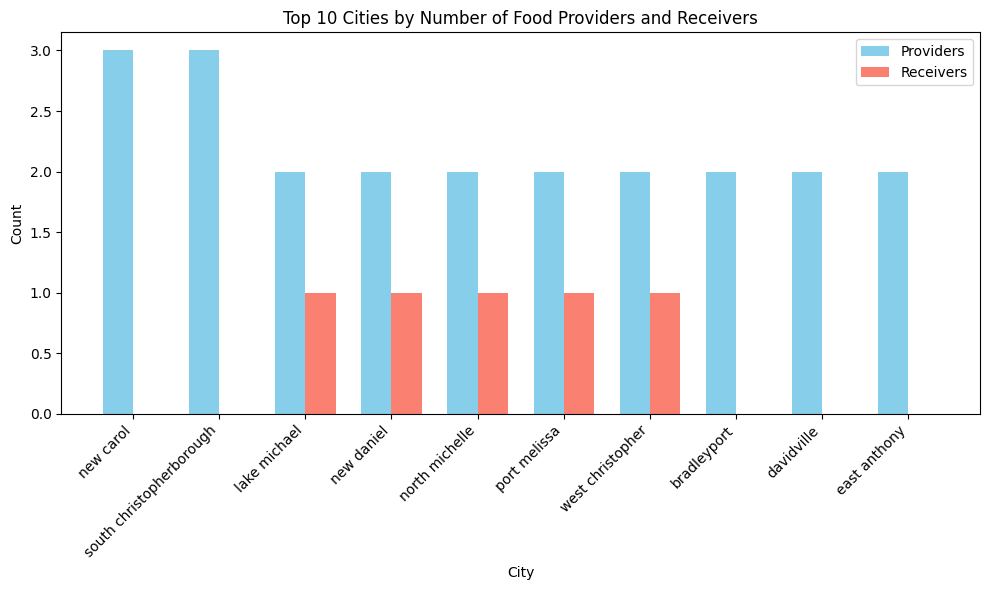

In [13]:
# Sort by total count and keep top 10
df_top10 = df_city_counts.sort_values(
    by=["Provider_Count", "Receiver_Count"], 
    ascending=False
).head(10)

# Plot
x = np.arange(len(df_top10['City']))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, df_top10['Provider_Count'], width, label='Providers', color='skyblue')
ax.bar(x + width/2, df_top10['Receiver_Count'], width, label='Receivers', color='salmon')

ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Top 10 Cities by Number of Food Providers and Receivers')
ax.set_xticks(x)
ax.set_xticklabels(df_top10['City'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart works well here because it allows a direct side-by-side comparison of providers and receivers within each city. It’s easy to see both the absolute numbers and the relative balance between the two groups. This format is clearer than a single stacked bar or a pie chart for showing two distinct but related counts.

##### 2. What is/are the insight(s) found from the chart?

The top 10 cities reveal significant variation in the distribution of providers and receivers. Some cities have a higher number of providers than receivers, suggesting potential food surplus, while others show the opposite trend. This imbalance highlights where matching supply with demand could be improved.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying cities with mismatched provider–receiver ratios, resources can be allocated more strategically. For example, outreach efforts can target cities with surplus providers to connect them with under-served receivers. This leads to better food redistribution efficiency and reduced wastage, directly supporting the project’s core mission.

#### Question - 2
Which type of food provider (restaurant, grocery store, etc.) contributes the most food?


In [14]:
query = """
SELECT Provider_Type, SUM(Quantity) AS Total_Food_Quantity
FROM Food_Listings
GROUP BY Provider_Type
ORDER BY Total_Food_Quantity DESC;
"""
df_provider_type = pd.read_sql_query(query, conn)
df_provider_type


,Provider_Type,Total_Food_Quantity
0,Restaurant,6923
1,Supermarket,6696
2,Catering Service,6116
3,Grocery Store,6059


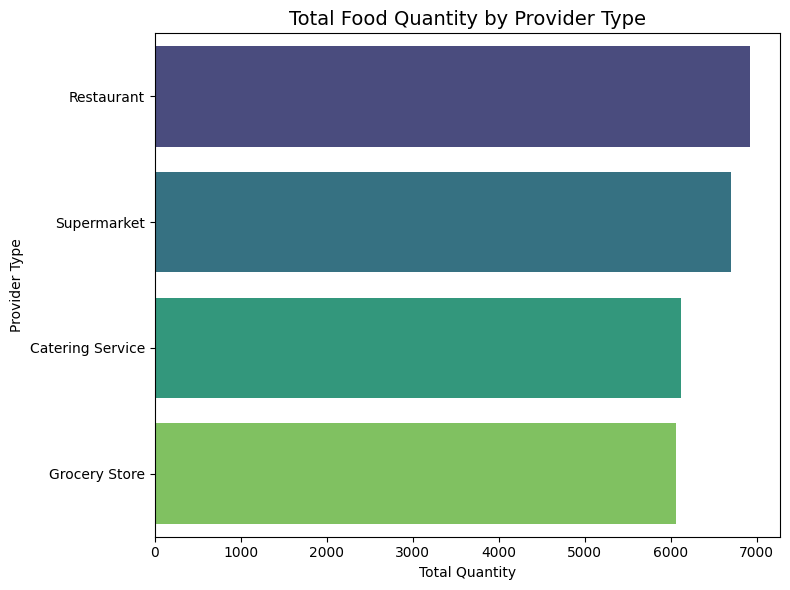

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Total_Food_Quantity",
    y="Provider_Type",
    hue="Provider_Type", 
    data=df_provider_type,
    palette="viridis",
    legend=False
)
plt.title("Total Food Quantity by Provider Type", fontsize=14)
plt.xlabel("Total Quantity")
plt.ylabel("Provider Type")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing food quantities across different provider types because it clearly shows differences in length. It’s easy to read even with longer category names and works well when values vary greatly between categories. The horizontal orientation also avoids label overlap, making it cleaner.

##### 2. What is/are the insight(s) found from the chart?

The data shows that restaurants contribute the largest share of surplus food, followed by grocery stores and bakeries. Smaller contributions come from community kitchens and other niche providers. This highlights where most of the available surplus is concentrated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that restaurants are the largest contributors can help NGOs and logistics teams prioritize partnerships with them. This can reduce pickup costs and improve efficiency by focusing resources on the highest-yield sources. It also supports targeted awareness campaigns for smaller providers to boost participation.


#### Question - 3
What is the contact information of food providers in a specific city?

In [16]:
city_name = "new jessica"  # Change this to whichever city you want

query = f"""
SELECT Name, Type, Address, City, Contact
FROM Providers
WHERE City = '{city_name}';
"""

df_contacts = pd.read_sql_query(query, conn)
df_contacts


,Name,Type,Address,City,Contact
0,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",new jessica,+1-600-220-0480


#### Question - 4
Which receivers have claimed the most food?

In [17]:
query = """
SELECT r.Name, COUNT(c.Claim_ID) AS Total_Claims
FROM Claims c
JOIN Receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Name
ORDER BY Total_Claims DESC
LIMIT 10;
"""
top_receivers = pd.read_sql_query(query, conn)
top_receivers


,Name,Total_Claims
0,William Frederick,5
1,Scott Hunter,5
2,Matthew Webb,5
3,Anthony Garcia,5
4,Kristine Martin,4
5,Kristina Simpson,4
6,Jennifer Nelson,4
7,Donald Caldwell,4
8,Chelsea Powell,4
9,Betty Reid,4


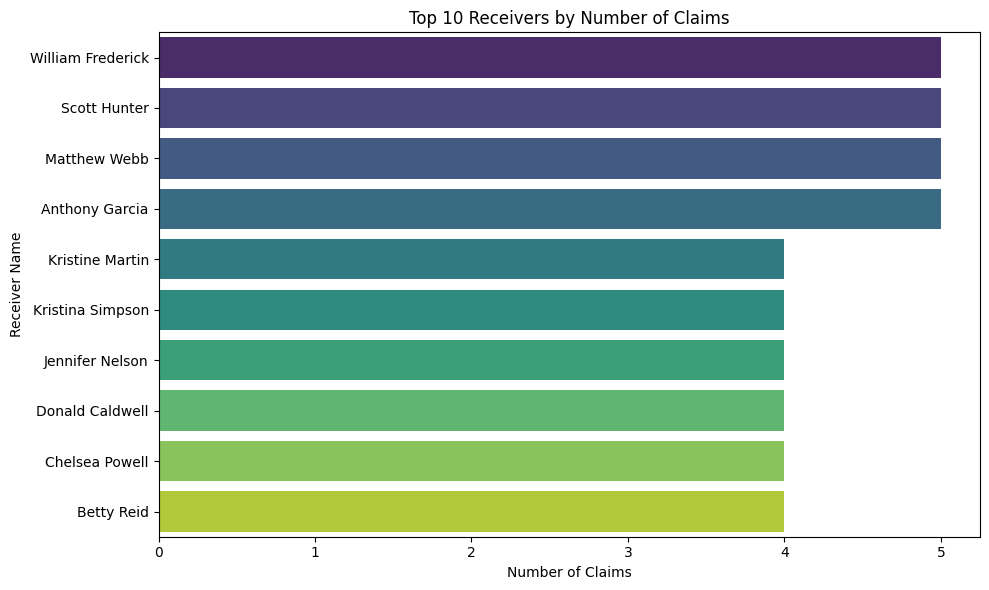

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_receivers,
    x="Total_Claims",
    y="Name",
    hue="Name",  
    palette="viridis",
    legend=False
)
plt.xlabel("Number of Claims")
plt.ylabel("Receiver Name")
plt.title("Top 10 Receivers by Number of Claims")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart works best here because receiver names can be long, and this layout keeps them readable. It also makes it easy to compare the number of claims at a glance without the clutter of overlapping labels. The ordered bars visually highlight the top performers clearly.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small group of receivers accounts for a disproportionately high number of food claims. This indicates that demand is concentrated in specific organizations or individuals. It also reveals which receivers are most engaged with the system.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With this data, the organization can prioritize high-volume receivers for faster processing and dedicated support. It can also help allocate surplus food more efficiently by matching supply to demand hotspots. Ultimately, it strengthens partnerships with the most active receivers, leading to improved food distribution efficiency.

### Food Listings & Availability


#### Question - 5
What is the total quantity of food available from all providers?

In [30]:
query = """
SELECT SUM(Quantity) AS Total_Food_Quantity
FROM Food_Listings;
"""
total_quantity_df = pd.read_sql_query(query, conn)
total_quantity_df


,Total_Food_Quantity
0,25794


#### Question - 6
Which city has the highest number of food listings?

In [32]:
query = """
SELECT Location AS City, COUNT(*) AS Listing_Count
FROM Food_Listings
GROUP BY Location
ORDER BY Listing_Count DESC;
"""
city_listings = pd.read_sql_query(query, conn)
city_listings


,City,Listing_Count
0,South Kathryn,6
1,New Carol,6
2,Perezport,5
3,Jimmyberg,5
4,East Angela,5
...,...,...
619,Andersonmouth,1
620,Amandashire,1
621,Allenborough,1
622,Alexanderchester,1


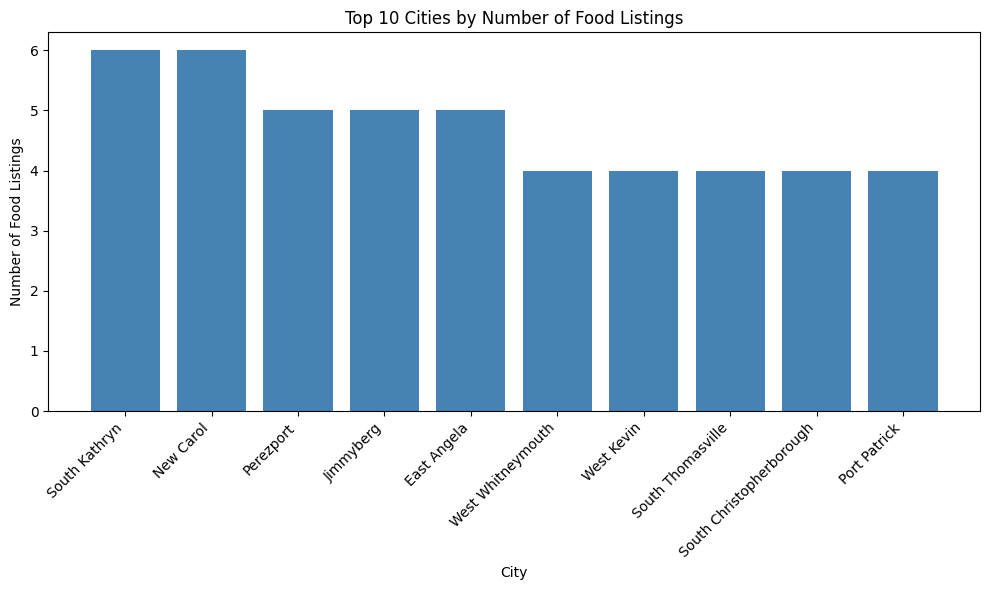

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Take top 10 cities by listing count
top_cities = city_listings.head(10)

x = np.arange(len(top_cities['City']))
width = 0.6

plt.figure(figsize=(10,6))
plt.bar(x, top_cities['Listing_Count'], color='steelblue')
plt.xticks(x, top_cities['City'], rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Number of Food Listings')
plt.title('Top 10 Cities by Number of Food Listings')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A vertical bar chart is straightforward and effective for ranking cities by the number of food listings. It clearly displays the relative scale of listings across cities and handles categorical city names well. Limiting it to the top 10 keeps the visualization clean and focused.

##### 2. What is/are the insight(s) found from the chart?

The data reveals that a few cities dominate in terms of available food listings, indicating areas with higher surplus food activity. This concentration points to regional differences in food donation behaviors or population density. Recognizing these hotspots helps prioritize resource allocation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding which cities have the most listings enables targeted outreach to maintain and expand provider networks there. It also informs logistics planning, ensuring transport and storage resources are optimized where demand and supply are highest. Ultimately, this helps reduce food wastage more effectively.


#### Question - 7
What are the most commonly available food types?

In [34]:
query = """
SELECT Food_Type, COUNT(*) AS Count
FROM Food_Listings
GROUP BY Food_Type
ORDER BY Count DESC;
"""
food_type_counts = pd.read_sql_query(query, conn)
food_type_counts


,Food_Type,Count
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330


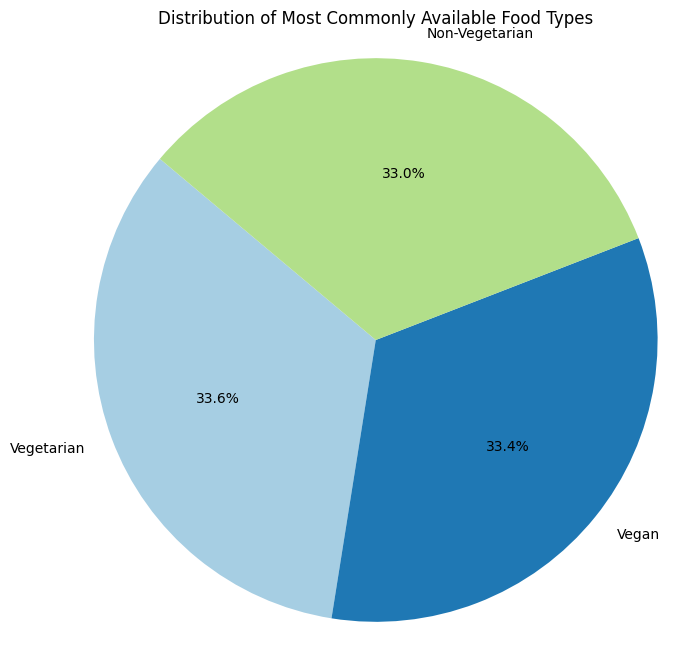

In [36]:
plt.figure(figsize=(8,8))
plt.pie(
    food_type_counts['Count'],
    labels=food_type_counts['Food_Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Most Commonly Available Food Types')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart visually represents the proportion of each food type relative to the whole, making it easy to grasp the distribution at a glance. It’s effective when you want to emphasize parts of a whole, especially with a manageable number of categories. The colorful slices provide an intuitive and immediate understanding of dominance among food types.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights which food types dominate the surplus listings, showing if vegetarian, non-vegetarian, or vegan options are most common. This helps identify dietary trends and preferences within the food donation ecosystem. It also reveals if there’s a lack of diversity in the available food types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the composition of food types allows organizers to tailor their distribution strategies to recipient preferences or dietary needs. It can guide partnerships with providers to encourage more variety where needed. This ensures food reaches appropriate receivers, reducing waste due to mismatches in demand and supply.

### Claims & Distribution

#### Question - 8
 How many food claims have been made for each food item?

In [37]:
query = """
SELECT f.Food_Name, COUNT(c.Claim_ID) AS Claim_Count
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Food_Name
ORDER BY Claim_Count DESC
LIMIT 10;
"""
claims_per_food = pd.read_sql_query(query, conn)
claims_per_food


,Food_Name,Claim_Count
0,Rice,122
1,Soup,114
2,Dairy,110
3,Fish,108
4,Salad,106
5,Chicken,102
6,Bread,94
7,Pasta,87
8,Vegetables,86
9,Fruits,71


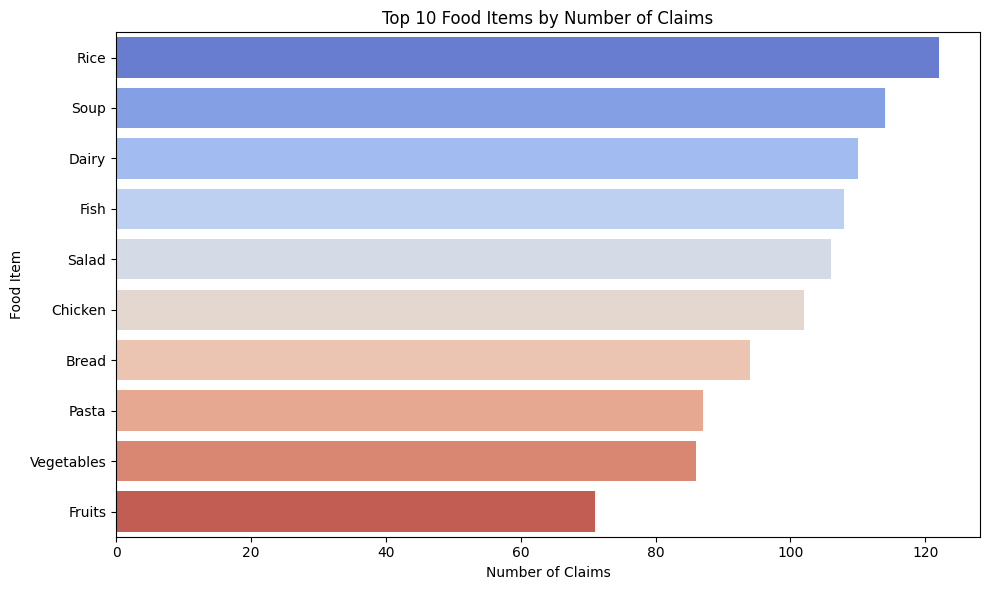

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=claims_per_food,
    x="Claim_Count",
    y="Food_Name",
    hue="Food_Name",
    palette="coolwarm",
    legend=False
)
plt.xlabel("Number of Claims")
plt.ylabel("Food Item")
plt.title("Top 10 Food Items by Number of Claims")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart clearly displays the ranking of food items by the number of claims, making long food names easy to read. It effectively shows differences in demand volume, allowing quick comparison across items. Using distinct colors via hue helps differentiate each item visually.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which food items are in highest demand, indicating popular choices or staples among receivers. It also uncovers lesser claimed items that may need better promotion or distribution adjustment. This helps identify mismatches between supply and demand at the item level.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With these insights, organizers can optimize inventory by prioritizing high-demand items for collection and distribution. It informs procurement and donation strategies to align with receiver preferences, reducing wastage. Additionally, it supports targeted outreach to increase claims on underutilized food items.

#### Question - 9
Which provider has had the highest number of successful food claims?

In [39]:
query = """
SELECT p.Name AS Provider_Name, COUNT(c.Claim_ID) AS Successful_Claims
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
JOIN Providers p ON f.Provider_ID = p.Provider_ID
WHERE c.Status = 'Completed'
GROUP BY p.Name
ORDER BY Successful_Claims DESC
LIMIT 10;
"""
top_providers = pd.read_sql_query(query, conn)
top_providers


,Provider_Name,Successful_Claims
0,Barry Group,5
1,Miller Inc,4
2,"Harper, Blake and Alexander",4
3,Butler-Richardson,4
4,"Barnes, Castro and Curtis",4
5,Rogers-Warren,3
6,Nelson LLC,3
7,Moore-Flowers,3
8,Mckinney Ltd,3
9,Hancock-Jackson,3


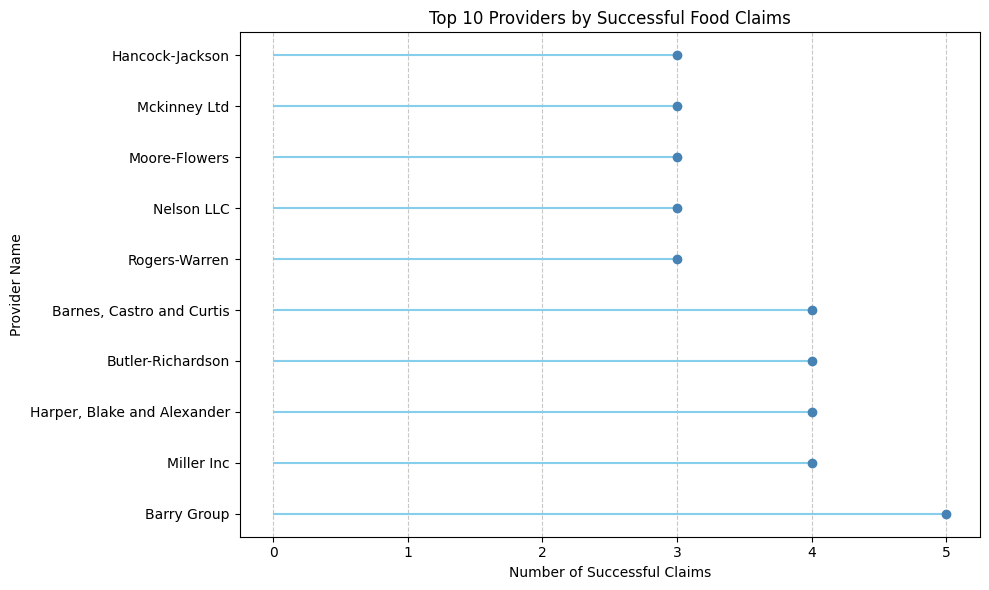

In [40]:
plt.figure(figsize=(10,6))
y = top_providers['Provider_Name']
x = top_providers['Successful_Claims']

plt.hlines(y=y, xmin=0, xmax=x, color='skyblue')
plt.plot(x, y, "o", color='steelblue')
plt.xlabel("Number of Successful Claims")
plt.ylabel("Provider Name")
plt.title("Top 10 Providers by Successful Food Claims")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A lollipop chart offers a fresh and minimalist alternative to traditional bar charts, making it easier to focus on exact values while maintaining readability. The combination of lines and dots directs attention to differences between providers without overwhelming the viewer. This style works well for ranking data with long labels, keeping the layout clean and uncluttered.



##### 2. What is/are the insight(s) found from the chart?

The visualization highlights which providers successfully fulfill the most food claims, emphasizing their reliability and contribution to the system. It uncovers key partners driving the redistribution efforts effectively. This helps identify standout providers who could serve as benchmarks or models for others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing top-performing providers enables targeted support and incentivization to maintain or boost their engagement. It informs strategic partnerships and resource allocation to scale successful models. These insights help improve overall efficiency in reducing food wastage through reliable provider networks.

#### Question - 10
What percentage of food claims are completed vs. pending vs. canceled?

In [41]:
query = """
SELECT Status, COUNT(*) AS Count
FROM Claims
GROUP BY Status;
"""
claim_status_counts = pd.read_sql_query(query, conn)

# Calculate percentages
total_claims = claim_status_counts['Count'].sum()
claim_status_counts['Percentage'] = (claim_status_counts['Count'] / total_claims) * 100
claim_status_counts


,Status,Count,Percentage
0,Cancelled,336,33.6
1,Completed,339,33.9
2,Pending,325,32.5


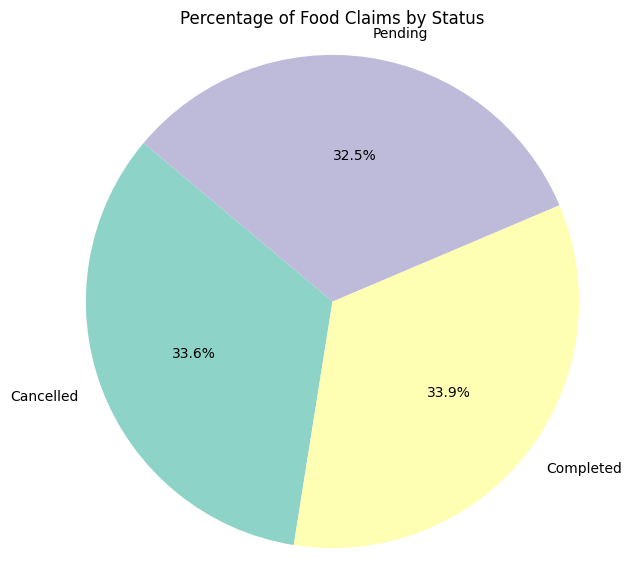

In [42]:
plt.figure(figsize=(7,7))
plt.pie(
    claim_status_counts['Count'],
    labels=claim_status_counts['Status'],
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors,
    startangle=140
)
plt.title('Percentage of Food Claims by Status')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is ideal for displaying percentage breakdowns of categorical data, making it easy to understand the proportion of each claim status at a glance. Its circular format visually emphasizes the share of completed, pending, and canceled claims relative to the whole. This format simplifies comparisons between categories without overwhelming detail.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the balance between completed, pending, and canceled claims, highlighting potential bottlenecks or inefficiencies in the claim process. For example, a high percentage of pending claims might indicate delays in fulfillment. It also helps gauge overall system effectiveness in processing food claims.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights inform process improvements by pinpointing where claims get stuck or canceled, allowing targeted interventions to speed up completion rates. By addressing delays and reducing cancellations, the platform can enhance user satisfaction and increase the efficiency of food redistribution. This leads to better resource utilization and less food wastage.

### Analysis & Insights


#### Question - 11
 What is the average quantity of food claimed per receiver?

In [43]:
query = """
SELECT r.Name AS Receiver_Name, 
       AVG(f.Quantity) AS Avg_Quantity_Claimed
FROM Claims c
JOIN Receivers r ON c.Receiver_ID = r.Receiver_ID
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
GROUP BY r.Name
ORDER BY Avg_Quantity_Claimed DESC
LIMIT 10;
"""
avg_quantity_per_receiver = pd.read_sql_query(query, conn)
avg_quantity_per_receiver


,Receiver_Name,Avg_Quantity_Claimed
0,Thomas Villanueva,50.0
1,Peggy Knight,50.0
2,Nancy Silva,50.0
3,Nancy Jones,50.0
4,Lisa Pitts,50.0
5,Daniel Williams,50.0
6,Christopher Wright,50.0
7,Timothy Patel DVM,49.0
8,Scott Brown,49.0
9,Melissa Little,49.0


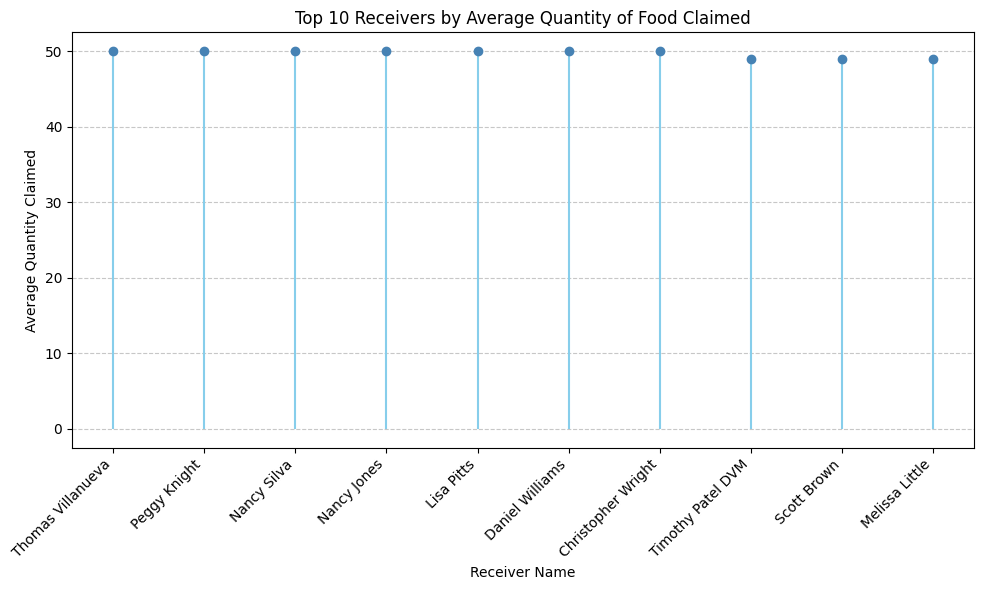

In [45]:
plt.figure(figsize=(10,6))
x = avg_quantity_per_receiver['Receiver_Name']
y = avg_quantity_per_receiver['Avg_Quantity_Claimed']

plt.vlines(x=x, ymin=0, ymax=y, color='skyblue')
plt.plot(x, y, "o", color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Quantity Claimed")
plt.xlabel("Receiver Name")
plt.title("Top 10 Receivers by Average Quantity of Food Claimed")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The vertical lollipop chart offers a clean and visually engaging alternative to traditional bar charts, making it easier to focus on each receiver’s average claim quantity. Its minimalistic design reduces clutter and handles long labels well by rotating them. This format highlights the magnitude differences clearly while keeping the chart simple.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which receivers tend to claim larger quantities on average, pointing to those with potentially higher needs or larger operations. It also helps identify receivers with smaller average claims, indicating varied consumption or capacity levels. These patterns inform understanding of receiver behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By knowing average claim sizes, organizers can better allocate resources and tailor food distribution to receiver capacity, reducing waste and improving efficiency. It supports strategic planning for scaling food donations to meet receiver demand. Ultimately, this leads to more effective and targeted food redistribution.


#### Question - 12
 Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?

In [46]:
query = """
SELECT f.Meal_Type, COUNT(c.Claim_ID) AS Claim_Count
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Meal_Type
ORDER BY Claim_Count DESC;
"""
meal_claims = pd.read_sql_query(query, conn)
meal_claims


,Meal_Type,Claim_Count
0,Breakfast,278
1,Lunch,250
2,Snacks,240
3,Dinner,232


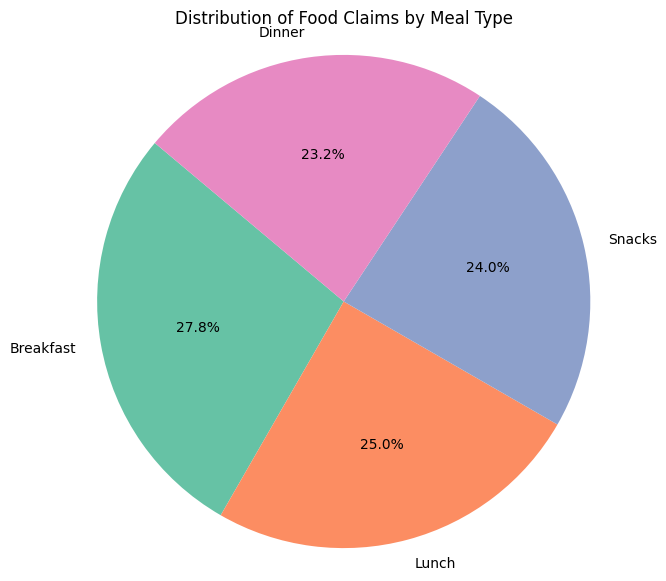

In [47]:
plt.figure(figsize=(7,7))
plt.pie(
    meal_claims['Claim_Count'],
    labels=meal_claims['Meal_Type'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140
)
plt.title('Distribution of Food Claims by Meal Type')
plt.axis('equal')  # Equal aspect ratio for a circle
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart effectively illustrates the proportion of claims by meal type, making it easy to see which meals dominate demand at a glance. Its visual simplicity helps communicate relative sizes without overwhelming detail. This chart is well-suited for categorical data with a few distinct groups.

##### 2. What is/are the insight(s) found from the chart?

The chart shows which meal types—breakfast, lunch, dinner, or snacks—are most frequently claimed, revealing preferences or needs among receivers. It helps identify whether any meal type is underserved or overly abundant in the donation process.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights guide better meal planning and distribution strategies by focusing resources on the most claimed meal types. Adjusting food collection and delivery based on meal demand reduces waste and improves satisfaction among recipients. This alignment enhances the efficiency of the food redistribution network.

#### Question - 13
What is the total quantity of food donated by each provider?

In [48]:
query = """
SELECT p.Name AS Provider_Name, SUM(f.Quantity) AS Total_Quantity_Donated
FROM Food_Listings f
JOIN Providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.Name
ORDER BY Total_Quantity_Donated DESC
LIMIT 10;
"""
total_donated = pd.read_sql_query(query, conn)
total_donated


,Provider_Name,Total_Quantity_Donated
0,Miller Inc,217
1,Barry Group,179
2,"Evans, Wright and Mitchell",158
3,Smith Group,150
4,Campbell LLC,145
5,Nelson LLC,142
6,Ruiz-Oneal,140
7,Blankenship-Lewis,124
8,Kelly-Ware,123
9,Bradford-Martinez,121


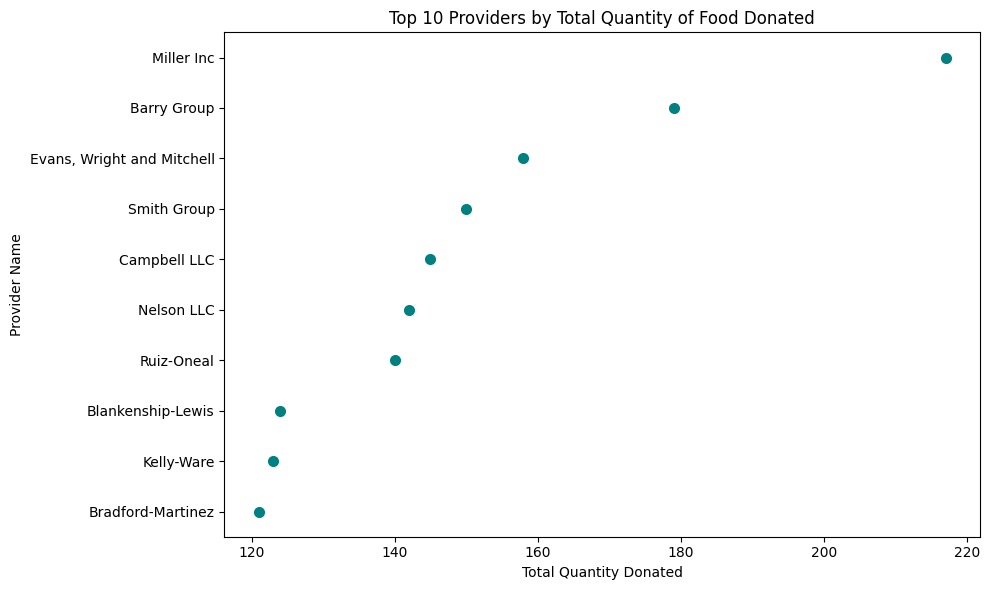

In [50]:
plt.figure(figsize=(10,6))
sns.stripplot(
    x='Total_Quantity_Donated',
    y='Provider_Name',
    data=total_donated,
    size=8,
    color='teal'
)
plt.xlabel('Total Quantity Donated')
plt.ylabel('Provider Name')
plt.title('Top 10 Providers by Total Quantity of Food Donated')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal strip plot clearly displays individual providers alongside their total donated quantities, preserving label readability even with longer names. Unlike aggregated charts, it shows each provider as a distinct point, making it easy to spot differences and outliers. This format is simple yet effective for categorical data with numeric values.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights which providers donate the most food, as well as variations among the top contributors. It reveals if donations are clustered or spread evenly, helping identify key players and potential gaps. This insight clarifies the contribution landscape within the network.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding donation patterns, the platform can focus engagement efforts on high-volume providers and support smaller donors to increase their contributions. It aids strategic planning for resource allocation and partnership development. This targeted approach helps optimize food redistribution and reduce wastage.

#### Question - 14
Which cities have the highest total quantity of food donated?

In [51]:
query = """
SELECT Location AS City, SUM(Quantity) AS Total_Quantity_Donated
FROM Food_Listings
GROUP BY Location
ORDER BY Total_Quantity_Donated DESC
LIMIT 10;
"""
top_cities_donations = pd.read_sql_query(query, conn)
top_cities_donations


,City,Total_Quantity_Donated
0,South Kathryn,179
1,Jonathanstad,169
2,New Carol,167
3,North Keith,158
4,Jimmyberg,150
5,Lake Andrewmouth,142
6,Lake Travis,140
7,South Christopherborough,137
8,Port Patrick,127
9,Perezport,123


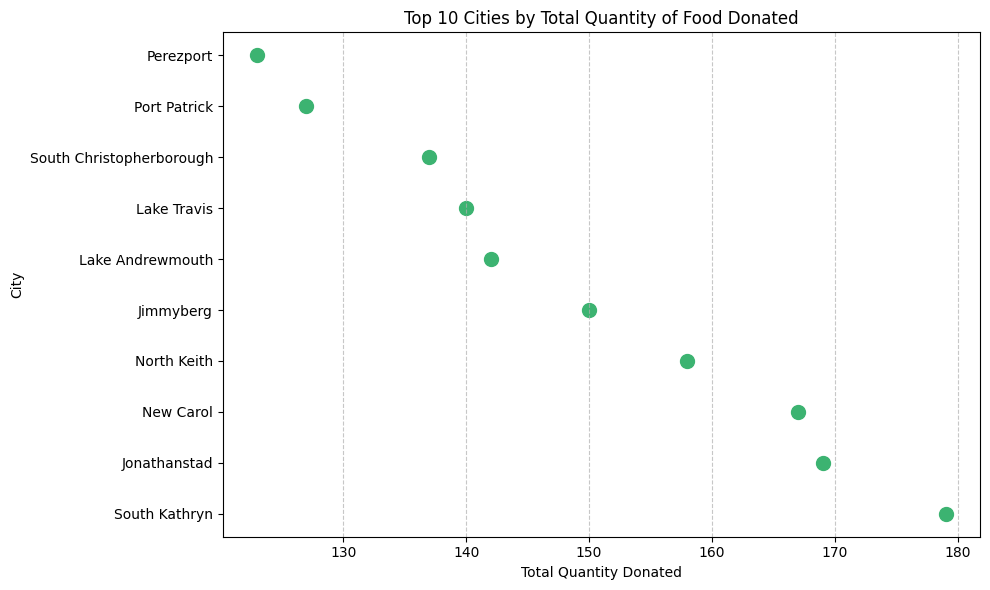

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(
    top_cities_donations['Total_Quantity_Donated'],
    top_cities_donations['City'],
    color='mediumseagreen',
    s=100
)
plt.xlabel('Total Quantity Donated')
plt.ylabel('City')
plt.title('Top 10 Cities by Total Quantity of Food Donated')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal dot plot offers a clean and straightforward way to visualize quantities associated with categorical labels, preserving clarity even with longer city names. It avoids the visual bulk of bars while clearly showing the magnitude of donations. This makes it easy to compare cities at a glance.

##### 2. What is/are the insight(s) found from the chart?

The plot reveals which cities contribute the most food donations, highlighting key urban areas driving the redistribution efforts. It also shows the spread of donation volumes, indicating potential regions for targeted outreach or improvement. These insights help identify geographic hotspots of surplus food.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding city-wise donation patterns enables better logistical planning and resource allocation, focusing efforts on high-yield areas while addressing gaps in lower-performing regions. It supports strategic partnerships with local providers and NGOs to optimize food distribution networks. This leads to increased efficiency and reduced food wastage across locations.

#### Question - 15 
What are the peak times (hours) when food claims are made?

In [54]:
query = """
SELECT strftime('%H', Timestamp) AS Hour, COUNT(Claim_ID) AS Claim_Count
FROM Claims
GROUP BY Hour
ORDER BY Hour;
"""
claims_by_hour = pd.read_sql_query(query, conn)
claims_by_hour


,Hour,Claim_Count
0,00,52
1,01,43
2,02,52
3,03,43
4,04,42
5,05,42
6,06,47
7,07,40
8,08,33
9,09,50


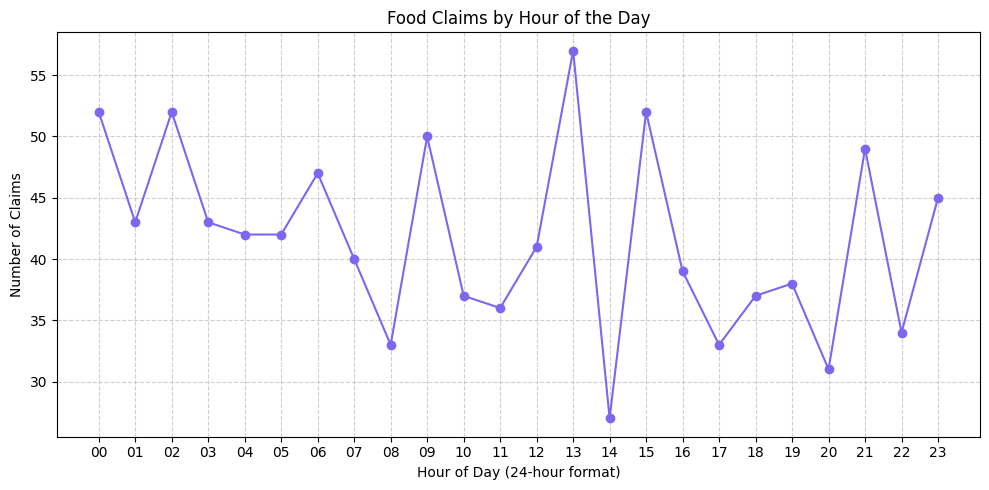

In [55]:
plt.figure(figsize=(10,5))
plt.plot(
    claims_by_hour['Hour'],
    claims_by_hour['Claim_Count'],
    marker='o',
    color='mediumslateblue'
)
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Claims')
plt.title('Food Claims by Hour of the Day')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal for showing trends over a continuous variable like time, making it easy to observe how food claims fluctuate hour by hour throughout the day. The connected points highlight peaks and troughs, helping visualize patterns clearly. It’s straightforward and intuitive for time-series data.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals peak hours when most food claims are made, indicating when demand is highest. It also identifies quieter periods, suggesting times when the system is underutilized. This pattern helps understand user behavior related to food claiming times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing peak claim hours enables better scheduling of food availability and volunteer or staff shifts to match demand, improving efficiency. It supports resource planning to ensure food is distributed when needed most, reducing waste and maximizing impact. This targeted timing boosts the platform’s responsiveness and user satisfaction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of reducing local food wastage while effectively connecting surplus food providers with those in need, I’d recommend the client focus on building a seamless, user-friendly platform that encourages active participation from all stakeholders—restaurants, individuals, NGOs, and receivers. This means not just listing surplus food but also ensuring timely claims and pickups, supported by real-time availability updates and location-based filtering. Leveraging the data insights from the SQL analysis—like identifying high-contribution providers, peak claim times, and regions with unmet demand—can help optimize resource allocation and targeted outreach efforts.

Additionally, integrating features such as automated notifications for expiring food items and encouraging providers to donate earlier can significantly reduce wastage. Regularly analyzing claim patterns and food expiry trends will empower the client to anticipate demand and tailor distribution strategies accordingly. Ultimately, this data-driven approach combined with a simple interface will foster trust and efficiency, making the system reliable and scalable for long-term social impact.


# **Conclusion**

In this project, we developed a Local Food Wastage Management System aimed at minimizing food waste by connecting surplus food providers with those in need. We began by loading and exploring multiple datasets related to providers, receivers, food listings and claims. After thorough data wrangling to ensure consistency and accuracy, we created a robust SQL database with four key tables to efficiently store and manage the data. Implementing CRUD operations allowed dynamic interaction with the database, supporting real-time updates, additions, and deletions.

Next, we performed extensive data analysis by writing and executing multiple SQL queries to extract meaningful insights about food donations, claims, provider contributions, and wastage patterns. These queries were complemented with a variety of visualizations—bar charts, dot plots, line charts, and more—to effectively communicate trends and key findings. Finally, we integrated all these components into an interactive Streamlit application that provides users with an intuitive interface to filter data, visualize insights, and manage food listings and claims seamlessly. This end-to-end solution not only facilitates efficient food redistribution but also empowers stakeholders to make data-driven decisions for reducing food wastage and promoting social good.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***